# Binary Classification using Deep Learning (TensorFlow & Keras)

## Objective
The goal of this project is to design, train, and evaluate a deep learning model for a binary classification task using TensorFlow and Keras.  
The project demonstrates the complete deep learning workflow, including data exploration, preprocessing, model architecture design, training with callbacks, and final evaluation on unseen test data.


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


## Dataset Description
The Heart Disease dataset is used for this project.  
Each row represents a patient record with multiple medical attributes such as age, cholesterol level, blood pressure, and heart rate.

- **Target variable**: `target`
  - 1 → Presence of heart disease
  - 0 → No heart disease


In [6]:
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Exploratory Data Analysis (EDA)

EDA was performed to understand the structure and characteristics of the dataset.  
This includes:
- Checking for missing values
- Analyzing feature distributions
- Studying correlations between features and the target variable
- 

The correlation heatmap helps identify relationships among features and ensures there are no severe multicollinearity issues.


In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

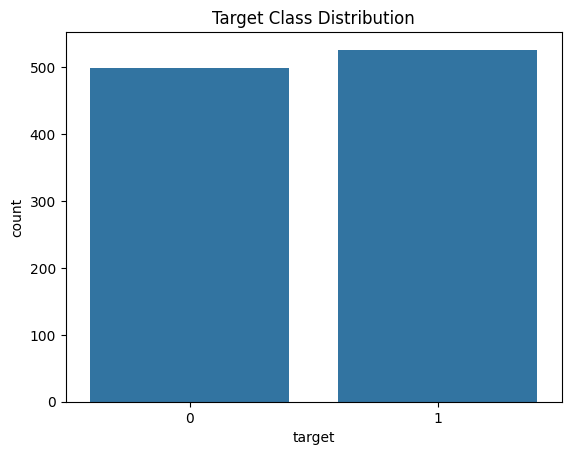

In [8]:
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()


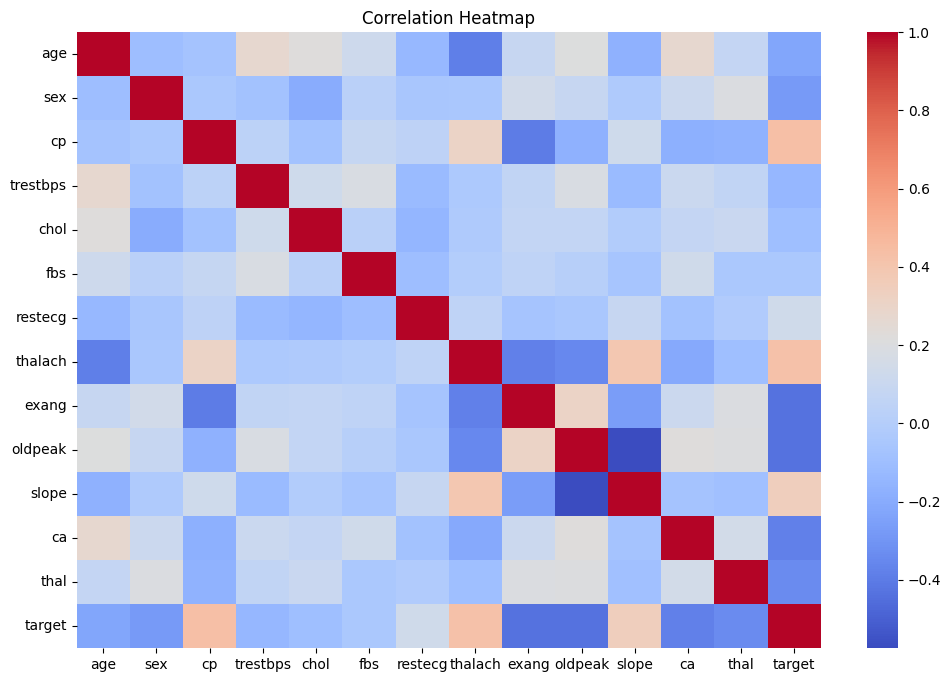

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [10]:
X = df.drop("target", axis=1)
y = df["target"]


In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)


## Neural Network Architecture

A Sequential neural network was designed with the following structure:
- Input layer matching the number of features
- Three hidden layers with ReLU activation
- Output layer with a single neuron and Sigmoid activation

ReLU helps capture non-linear patterns, while Sigmoid is suitable for binary classification.


In [13]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


## Model Training and Callbacks

The model was compiled using:
- **Loss function**: Binary Crossentropy
- **Optimizer**: Adam
- **Metric**: Accuracy

Two callbacks were used:
- **EarlyStopping** to prevent overfitting by monitoring validation loss
- **ModelCheckpoint** to save the best model based on validation performance


In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [15]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "model/best_model.h5",
    monitor='val_loss',
    save_best_only=True
)


In [16]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/100
20/20 [==============================] - 5s 77ms/step - loss: 0.6683 - accuracy: 0.6260 - val_loss: 0.6265 - val_accuracy: 0.7512
Epoch 2/100
20/20 [==============================] - 1s 27ms/step - loss: 0.5711 - accuracy: 0.8244 - val_loss: 0.5218 - val_accuracy: 0.8293
Epoch 3/100
20/20 [==============================] - 1s 26ms/step - loss: 0.4588 - accuracy: 0.8374 - val_loss: 0.4197 - val_accuracy: 0.8390
Epoch 4/100
20/20 [==============================] - 0s 25ms/step - loss: 0.3826 - accuracy: 0.8569 - val_loss: 0.3606 - val_accuracy: 0.8195
Epoch 5/100
20/20 [==============================] - 1s 27ms/step - loss: 0.3445 - accuracy: 0.8634 - val_loss: 0.3267 - val_accuracy: 0.8390
Epoch 6/100
20/20 [==============================] - 0s 25ms/step - loss: 0.3206 - accuracy: 0.8683 - val_loss: 0.3057 - val_accuracy: 0.8683
Epoch 7/100
20/20 [==============================] - 1s 35ms/step - loss: 0.2987 - accuracy: 0.8748 - val_loss: 0.3013 - val_accuracy: 0.8780
Epoch 

## Training and Validation Curves

The loss and accuracy curves show the model’s learning behavior across epochs.
- Training and validation loss decrease steadily
- No major divergence is observed, indicating minimal overfitting

Early stopping helped in selecting the optimal number of training epochs.


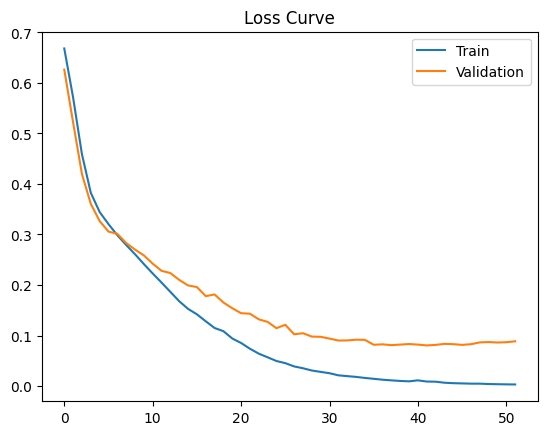

In [17]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss Curve")
plt.legend()
plt.show()


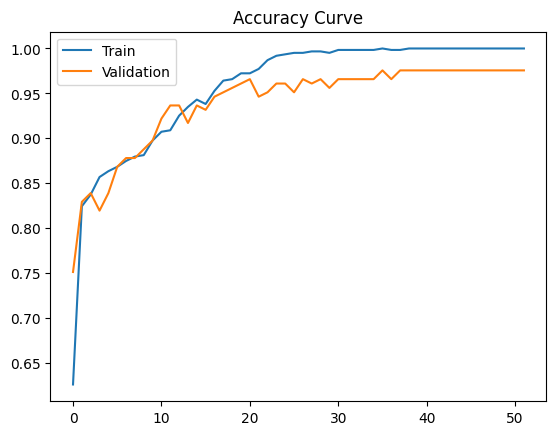

In [18]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy Curve")
plt.legend()
plt.show()


In [19]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_prob))


7/7 [==============================] - 1s 10ms/step
Accuracy : 0.975609756097561
Precision: 0.9901960784313726
Recall   : 0.9619047619047619
F1-score : 0.9758454106280193
ROC-AUC  : 0.9914285714285714


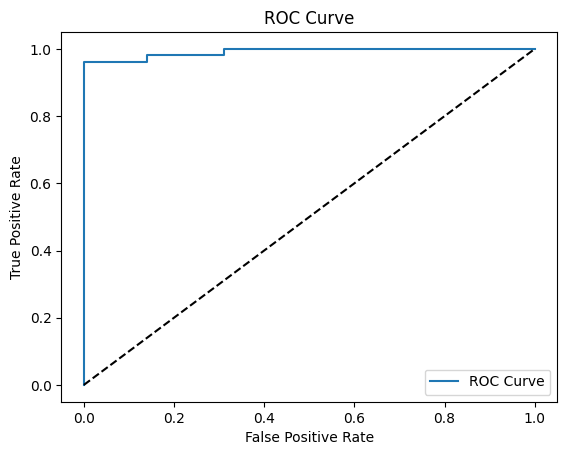

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Model Evaluation

The final model was evaluated on the test dataset, which was not used during training or validation.

The following metrics were reported:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC

These metrics provide a comprehensive view of the model’s classification performance.


In [21]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_pred_prob)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)
print("ROC-AUC  :", roc_auc)


7/7 [==============================] - 0s 7ms/step
Accuracy : 0.975609756097561
Precision: 0.9901960784313726
Recall   : 0.9619047619047619
F1-score : 0.9758454106280193
ROC-AUC  : 0.9914285714285714


In [22]:
final_model = tf.keras.models.load_model("model/best_model.h5")


## Conclusion

In this project, a deep learning model was successfully built and evaluated for binary classification using TensorFlow and Keras.  
The model achieved strong performance on the test set, demonstrating the effectiveness of proper preprocessing, model design, and regularization using callbacks.

This project provides a solid foundation for applying deep learning techniques to real-world classification problems.
